# **Exploring Obesity Levels: Insights from  Physical Condition and Gym Exercise Patterns**

<h2>Table of Contents</h2>
<ul>
<li>Introduction</li>
<li>Data Wrangling</li>
<li>Data Cleaning</li>
<li>Exploratory Data Analysis</li>
<li>Conclusions</li>
</ul>

# **Introduction**

Obesity represents an increasing global health issue, shaped by a combination of lifestyle choices, eating behaviors, and levels of physical activity. Gaining a clear understanding of the elements that contribute to obesity and recognizing behavior patterns can assist in creating effective strategies and interventions to tackle this problem. This project integrates two complementary datasets to examine the interaction between eating behaviors, physical health, and exercise habits.

The first dataset, “Estimation of Obesity Levels Based on Eating Habits and Physical Condition,” sheds light on obesity rates among individuals in Mexico, Peru, and Colombia. It encompasses details such as dietary practices, levels of physical activity, and classifications of obesity ranging from underweight to various obesity categories. This dataset acts as a basis for investigating the correlation between lifestyle choices and body weight along with overall health.

The second dataset, “Gym Members Exercise Tracking”, records comprehensive exercise behaviors, including workout intensity, heart rate, BMI, and level of experience. This information provides a deeper understanding of physical activity, which is vital for addressing obesity and enhancing overall fitness.

By merging these datasets, this project aims to:

Examine the connections between dietary habits, physical activity, and levels of obesity.
Recognize patterns in exercise behaviors that lead to improved health results.
Offer insights into how dietary and physical elements can collectively affect obesity and fitness advancement.
Through statistical analysis, data visualization, and predictive modeling, this study aspires to deliver practical insights regarding the factors affecting obesity and emphasize opportunities for fostering healthier lifestyles.

# Data Wrangling

## **Importing needed library**

In [108]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading DataSets In Different Ways

**Load "gym_members_exercise_tracking.csv" file Manually**

In [45]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gym_members_exercise_tracking.csv')
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


**Load the dataset "Estimation of Obesity Levels Based On Eating Habits and Physical Condition" through APIs, utilizing the ucimlrepo library to fetch datasets from the UCI ML Repository automatically.**

In [ ]:
pip install ucimlrepo

In [47]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)


{'uci_id': 544, 'name': 'Estimation of Obesity Levels Based On Eating Habits and Physical Condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Sep 10 2024', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'ID': 358, 'type': 

# Data Assessing

## Dropping unuseful columns and doing some enhancements on 'DATA' dataset

In [48]:
#drop unusfule column from Data dataset
columns = ['Max_BPM', 'Avg_BPM', 'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned', 'Experience_Level','Fat_Percentage']
data = data.drop(columns=columns) # Drop the specified columns

Renaming Columns

In [49]:

# Dictionary for renaming columns
columns_rename = {
    'Workout_Frequency (days/week)': 'Workout(days/week)'
}

# Renaming the columns in data
data = data.rename(columns=columns_rename)

# Verify the changes
print(data.columns)


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Workout_Type',
       'Water_Intake (liters)', 'Workout(days/week)', 'BMI'],
      dtype='object')


In [50]:
data.head() # Display the first few rows of the dataset

,Age,Gender,Weight (kg),Height (m),Workout_Type,Water_Intake (liters),Workout(days/week),BMI
0,56,Male,88.3,1.71,Yoga,3.5,4,30.20
1,46,Female,74.9,1.53,HIIT,2.1,4,32.00
2,32,Female,68.1,1.66,Cardio,2.3,4,24.71
3,25,Male,53.2,1.70,Strength,2.1,3,18.41
4,38,Male,46.1,1.79,Strength,2.8,3,14.39


In [51]:
data.info() # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    973 non-null    int64  
 1   Gender                 973 non-null    object 
 2   Weight (kg)            973 non-null    float64
 3   Height (m)             973 non-null    float64
 4   Workout_Type           973 non-null    object 
 5   Water_Intake (liters)  973 non-null    float64
 6   Workout(days/week)     973 non-null    int64  
 7   BMI                    973 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 60.9+ KB


In [52]:
data.isnull().sum() # Check for missing values

,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Workout_Type,0
Water_Intake (liters),0
Workout(days/week),0
BMI,0


In [53]:
data.duplicated().sum()  # Check for duplicates


0

In [54]:
data.columns


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Workout_Type',
       'Water_Intake (liters)', 'Workout(days/week)', 'BMI'],
      dtype='object')

## Dropping unuseful columns and doing some enhancements on 'X' dataset

In [55]:
# List of columns to drop
columns_to_drop = ['family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CALC', 'MTRANS','SCC','TUE']

# Dropping the columns from the dataframe
X=X.drop(columns=columns_to_drop)

# Verify the columns were removed
print(X.columns)


Index(['Gender', 'Age', 'Height', 'Weight', 'CH2O', 'FAF'], dtype='object')


 Renaming Columns

In [56]:
# Dictionary for renaming columns
columns_to_rename = {
    'Height': 'Height (m)',
    'Weight': 'Weight (kg)',
    'CH2O': 'Water_Intake (liters)',
    'FAF': 'Workout(days/week)'
}

# Renaming the columns in X
X = X.rename(columns=columns_to_rename)

# Verify the changes
print(X.columns)


Index(['Gender', 'Age', 'Height (m)', 'Weight (kg)', 'Water_Intake (liters)',
       'Workout(days/week)'],
      dtype='object')


 Casting Needed Types

In [57]:
# Convert the 'Workout(days/week)' column to integer type
X['Workout(days/week)'] = X['Workout(days/week)'].astype(int)
X['Age'] = X['Age'].astype(int)  # Convert the 'Age' column to integer type


In [58]:
# Check the first few rows of the feature data
print(X.head())

   Gender  Age  Height (m)  Weight (kg)  Water_Intake (liters)  \
0  Female   21        1.62         64.0                    2.0   
1  Female   21        1.52         56.0                    3.0   
2    Male   23        1.80         77.0                    2.0   
3    Male   27        1.80         87.0                    2.0   
4    Male   22        1.78         89.8                    2.0   

   Workout(days/week)  
0                   0  
1                   3  
2                   2  
3                   2  
4                   0  


In [59]:
print(X.isnull().sum()) # Check for missing values

Gender                   0
Age                      0
Height (m)               0
Weight (kg)              0
Water_Intake (liters)    0
Workout(days/week)       0
dtype: int64


In [60]:
print(X.duplicated().sum())  # Check for duplicates

28


In [62]:
X = X.drop_duplicates()  # Remove duplicates
print(f"Number of duplicates in X after removal: {X.duplicated().sum()}") # Verify the removal of duplicates

Number of duplicates in X after removal: 0


# Data Cleaning

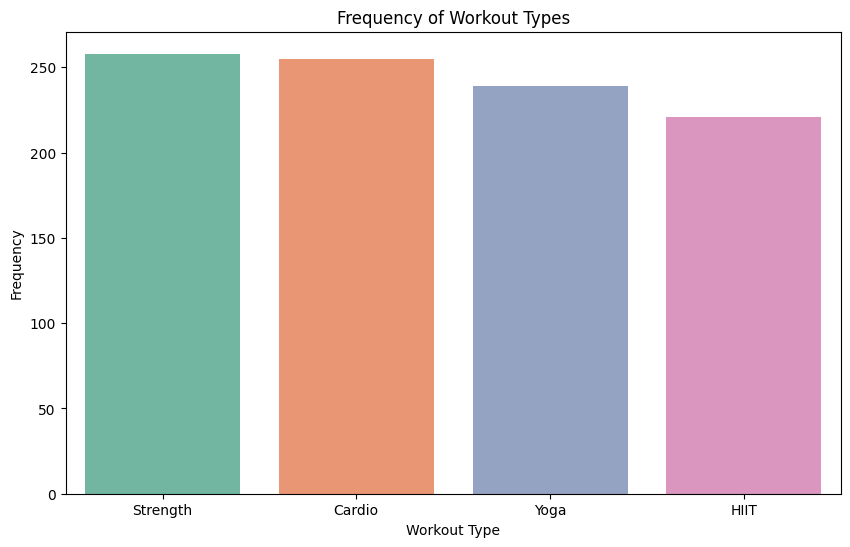

In [63]:
# Frequency count
frequency = data['Workout_Type'].value_counts()

# Plotting with a Seaborn color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=frequency.index, y=frequency.values, palette='Set2')
plt.title('Frequency of Workout Types')
plt.xlabel('Workout Type')
plt.ylabel('Frequency')
plt.show()


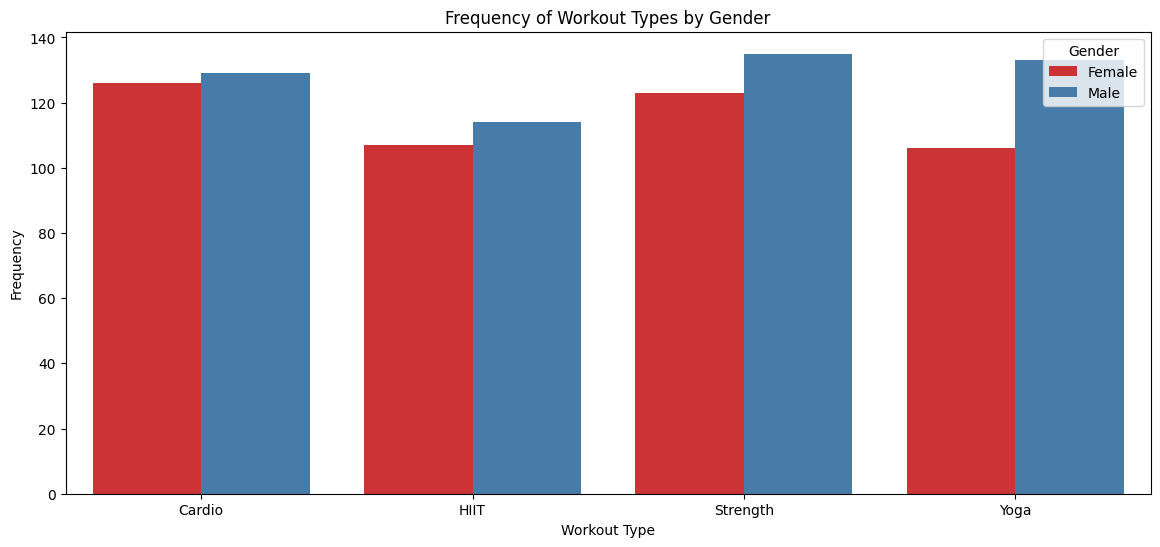

In [64]:
# Group by 'Workout_Type' and 'Gender' and count the occurrences
grouped_data = data.groupby(['Workout_Type', 'Gender']).size().reset_index(name='Frequency')

# Plotting the barplot
plt.figure(figsize=(14, 6))
sns.barplot(x='Workout_Type', y='Frequency', hue='Gender', data=grouped_data, palette='Set1')
plt.title('Frequency of Workout Types by Gender')
plt.xlabel('Workout Type')
plt.ylabel('Frequency')
plt.legend(title='Gender', loc='upper right')
plt.show()


In [65]:
#The Yoga result is interesting
data.shape

(973, 8)

In [66]:
max_bmi = data['BMI'].max()
print(f"The maximum BMI is: {max_bmi}")


The maximum BMI is: 49.84


Add BMI COLUMN to X dataset

In [67]:
# Ensure no division by zero (Height should not be zero)
X = X[X['Height (m)'] > 0]

# Calculate BMI using Weight and Height from the X dataset
X['BMI'] = X['Weight (kg)'] / (X['Height (m)'] ** 2)

# Display the updated X dataset
print(X.head())


   Gender  Age  Height (m)  Weight (kg)  Water_Intake (liters)  \
0  Female   21        1.62         64.0                    2.0   
1  Female   21        1.52         56.0                    3.0   
2    Male   23        1.80         77.0                    2.0   
3    Male   27        1.80         87.0                    2.0   
4    Male   22        1.78         89.8                    2.0   

   Workout(days/week)        BMI  
0                   0  24.386526  
1                   3  24.238227  
2                   2  23.765432  
3                   2  26.851852  
4                   0  28.342381  


Checking BMI DATA TYPE

In [68]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2083 entries, 0 to 2110
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2083 non-null   object 
 1   Age                    2083 non-null   int64  
 2   Height (m)             2083 non-null   float64
 3   Weight (kg)            2083 non-null   float64
 4   Water_Intake (liters)  2083 non-null   float64
 5   Workout(days/week)     2083 non-null   int64  
 6   BMI                    2083 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 130.2+ KB
None


Fix the issue by Rounding

In [69]:
X['BMI'] = X['BMI'].round(2)  # Round BMI to 2 decimal places
print(X.head())  # Display the updated X dataset


   Gender  Age  Height (m)  Weight (kg)  Water_Intake (liters)  \
0  Female   21        1.62         64.0                    2.0   
1  Female   21        1.52         56.0                    3.0   
2    Male   23        1.80         77.0                    2.0   
3    Male   27        1.80         87.0                    2.0   
4    Male   22        1.78         89.8                    2.0   

   Workout(days/week)    BMI  
0                   0  24.39  
1                   3  24.24  
2                   2  23.77  
3                   2  26.85  
4                   0  28.34  


In [70]:
# Strip leading/trailing spaces
X['Gender'] = X['Gender'].str.strip()
data['Gender'] = data['Gender'].str.strip()

# Make sure the case is consistent
X['Gender'] = X['Gender'].str.lower()
data['Gender'] = data['Gender'].str.lower()


Removing Work_out Column

In [71]:
data = data.drop('Workout_Type', axis=1) # Drop the 'Workout_Type' column from the 'data' dataset

In [72]:
data.head()

,Age,Gender,Weight (kg),Height (m),Water_Intake (liters),Workout(days/week),BMI
0,56,male,88.3,1.71,3.5,4,30.20
1,46,female,74.9,1.53,2.1,4,32.00
2,32,female,68.1,1.66,2.3,4,24.71
3,25,male,53.2,1.70,2.1,3,18.41
4,38,male,46.1,1.79,2.8,3,14.39


In [73]:
X.head()

,Gender,Age,Height (m),Weight (kg),Water_Intake (liters),Workout(days/week),BMI
0,female,21,1.62,64.0,2.0,0,24.39
1,female,21,1.52,56.0,3.0,3,24.24
2,male,23,1.80,77.0,2.0,2,23.77
3,male,27,1.80,87.0,2.0,2,26.85
4,male,22,1.78,89.8,2.0,0,28.34


**So now same columns in both datasets**

In [80]:
# Concatenate the two datasets along rows (axis=0)
combined_data = pd.concat([X, data], ignore_index=True)


In [75]:
print(combined_data.columns)  # Check the column names


Index(['Gender', 'Age', 'Height (m)', 'Weight (kg)', 'Water_Intake (liters)',
       'Workout(days/week)', 'BMI'],
      dtype='object')


In [76]:
combined_data.shape

(3056, 7)

In [81]:
# Check for missing values
print(combined_data.isnull().sum())

Gender                   0
Age                      0
Height (m)               0
Weight (kg)              0
Water_Intake (liters)    0
Workout(days/week)       0
BMI                      0
dtype: int64


In [82]:
combined_data.duplicated().sum()

0

In [83]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 3056 non-null   object 
 1   Age                    3056 non-null   int64  
 2   Height (m)             3056 non-null   float64
 3   Weight (kg)            3056 non-null   float64
 4   Water_Intake (liters)  3056 non-null   float64
 5   Workout(days/week)     3056 non-null   int64  
 6   BMI                    3056 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 167.2+ KB


In [84]:
# save the combine 'combined_data' in a csv file

# Assuming 'combined_data' DataFrame is already created as in your provided code.
combined_data.to_csv('combined_data.csv', index=False)  # Save to CSV, no index column

# Analysis and Questions

## Analysis

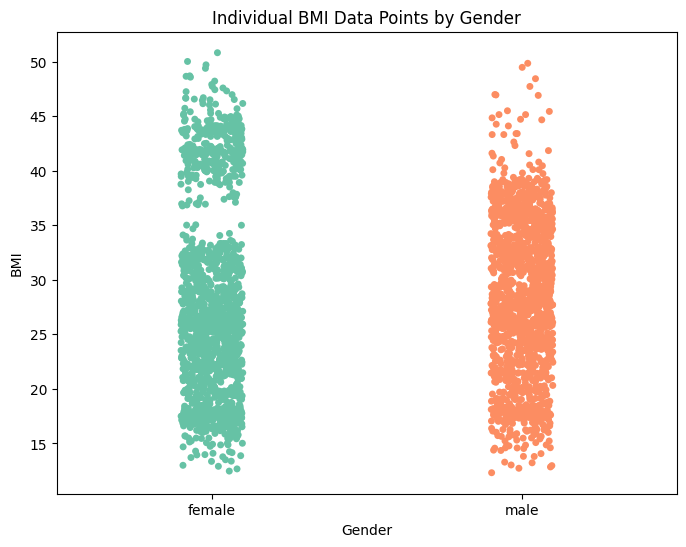

In [85]:
# Create a Strip Plot to show individual BMI data points by Gender
plt.figure(figsize=(8, 6))
sns.stripplot(x='Gender', y='BMI', data=combined_data, jitter=True, palette='Set2')
plt.title('Individual BMI Data Points by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

### Check the percentage of obesity.

30 or more (BMI) Values may indicate obese

In [106]:
# Filter the dataset where BMI >= 30
high_bmi =combined_data[combined_data['BMI'] >= 30]

# Count the number of rows (individuals) with BMI >= 30
count_high_bmi = len(high_bmi)

# Display the result
print(f"Number of individuals with BMI >= 30: {count_high_bmi}")


Number of individuals with BMI >= 30: 1166


In [107]:
percentage_bmi_30 = (len(high_bmi) / len(combined_data)) * 100  # Calculate the percentage
print(f"Percentage of individuals with BMI >= 30: {percentage_bmi_30:.2f}%")  # Display the result with 2 decimal places


Percentage of individuals with BMI >= 30: 38.15%


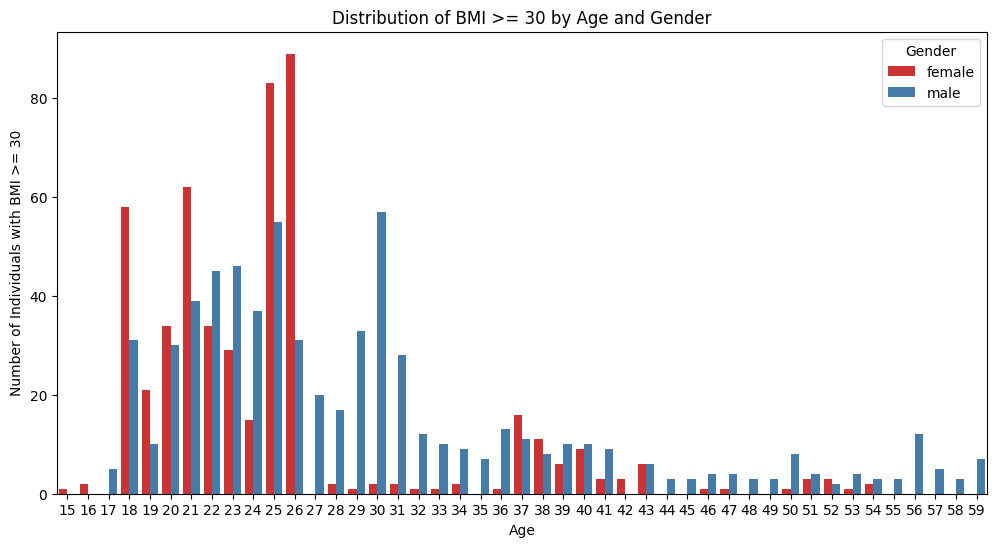

In [101]:
# Filter the dataset where BMI >= 30
high_bmi = combined_data[combined_data['BMI'] >= 30]

# Group by Age and Gender to count the number of individuals with BMI >= 30
grouped_bmi = high_bmi.groupby(['Age', 'Gender']).size().reset_index(name='Count')

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Count', hue='Gender', data=grouped_bmi, palette='Set1')

# Adding title and labels
plt.title('Distribution of BMI >= 30 by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Number of Individuals with BMI >= 30')
plt.legend(title='Gender')

plt.show()


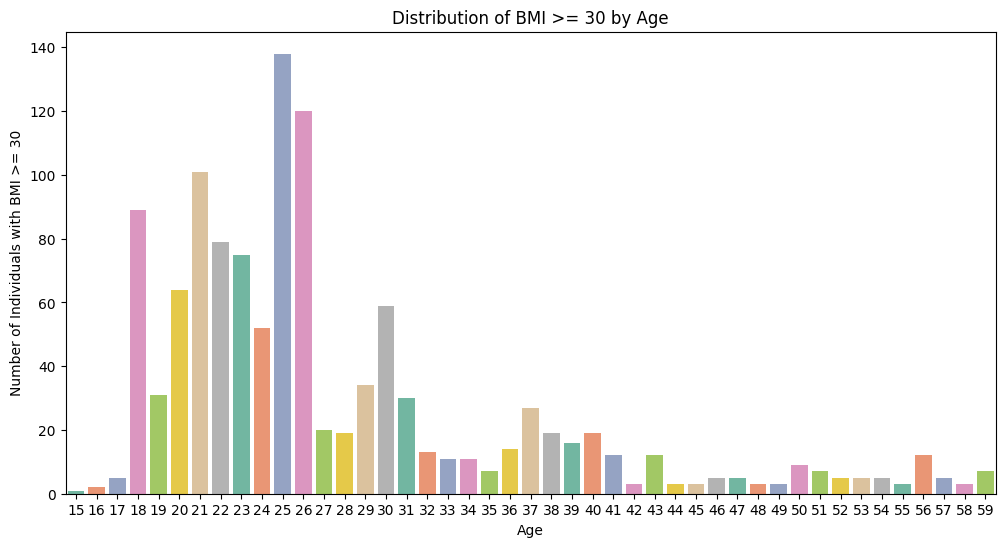

In [102]:
# Filter the dataset where BMI >= 30
high_bmi = combined_data[combined_data['BMI'] >= 30]

# Group by Age to count the number of individuals with BMI >= 30
grouped_bmi_age = high_bmi.groupby('Age').size().reset_index(name='Count')

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Count', data=grouped_bmi_age, palette='Set2')

# Adding title and labels
plt.title('Distribution of BMI >= 30 by Age')
plt.xlabel('Age')
plt.ylabel('Number of Individuals with BMI >= 30')

plt.show()


In [90]:
# Find the row with the maximum BMI
max_bmi_row = combined_data.loc[combined_data['BMI'].idxmax()]

# Display the maximum BMI value and its corresponding data
max_bmi_value = max_bmi_row['BMI']
print("Maximum BMI:", max_bmi_value)
print("Data corresponding to maximum BMI:")
print(max_bmi_row)

# Gender                    male
# Age                         47
# Height (m)                1.93
# Weight (kg)               45.9
# Water_Intake (liters)      2.0
# Workout(days/week)           3
# BMI                      12.32


Maximum BMI: 50.81
Data corresponding to maximum BMI:
Gender                       female
Age                              21
Height (m)                 1.730113
Weight (kg)              152.094362
Water_Intake (liters)      2.374958
Workout(days/week)                0
BMI                           50.81
Name: 1786, dtype: object


In [91]:
# Add BMI categories based on the classification
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal Weight'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

combined_data['BMI_Category'] = combined_data['BMI'].apply(classify_bmi)


In [92]:
bmi_counts = combined_data['BMI_Category'].value_counts()
print(bmi_counts)


BMI_Category
Obese            1166
Overweight        792
Normal Weight     666
Underweight       432
Name: count, dtype: int64


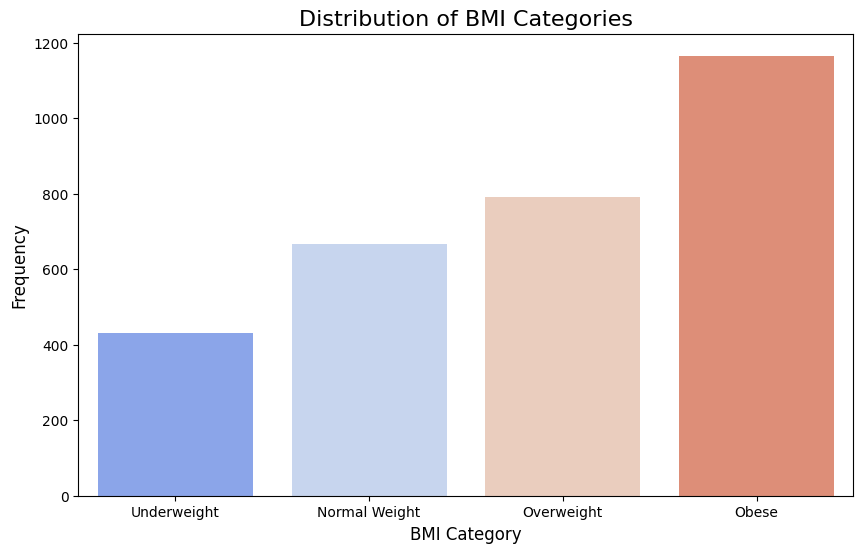

In [93]:
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='BMI_Category', order=['Underweight', 'Normal Weight', 'Overweight', 'Obese'], palette='coolwarm')

# Adding labels and title
plt.title('Distribution of BMI Categories', fontsize=16)
plt.xlabel('BMI Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()


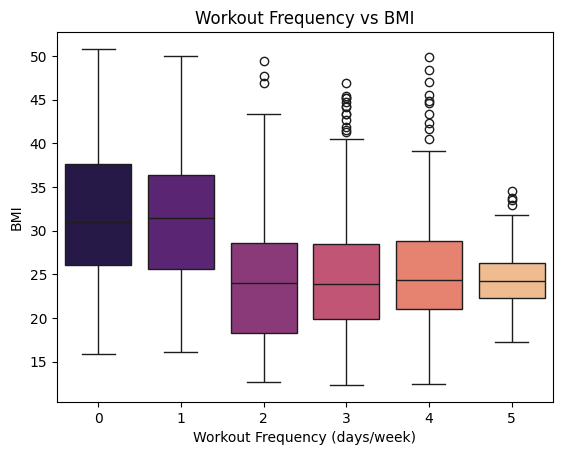

In [97]:
sns.boxplot(data=combined_data, x='Workout(days/week)', y='BMI', palette='magma')
plt.title('Workout Frequency vs BMI')
plt.xlabel('Workout Frequency (days/week)')
plt.ylabel('BMI')
plt.show()

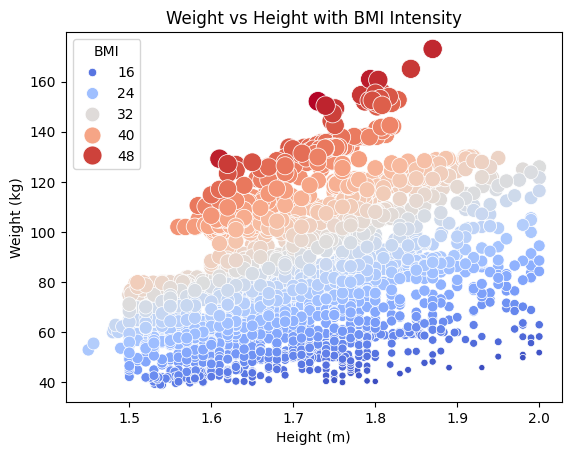

In [98]:
sns.scatterplot(data=combined_data, x='Height (m)', y='Weight (kg)', hue='BMI', palette='coolwarm', size='BMI', sizes=(20, 200))
plt.title('Weight vs Height with BMI Intensity')
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

## Questions

### 1. Does exercise preference differ by gender?
The chart "Frequency of Exercise Types by Gender" shows that males exercise more often than females. Males mainly prefer strength training and yoga, while females focus on cardio and strength exercises.
### 2. How do BMI values differ between the genders?
 Body Mass Index (BMI) values exhibit variations between the genders, with a notable concentration observed in females.
### 3. What is the percentage of obesity in the data set?
 38.15% of the people have a BMI >=30
### 4. How do BMI values ​​differ between ages and genders?
The highest proportion of individuals with a BMI over 30 (obese) was among adolescents and young adults aged 17 to 40. More males had a BMI above 30, but the highest recorded BMI was 50.81 in a 21-year-old female, while the lowest was 12.32 in a 47-year-old male.
### 5. Is BMI affected by age?
A noticeable increase in BMI levels among people in their twenties, often exceeding normal ranges.
### 6. How are BMI categories distributed?
The dataset encompasses a diverse population across various Body Mass Index (BMI) categories, with the high BMI (OBESE) category exhibiting the most significant representation.
### 7. Do movement and workout affect the body mass index?
Yes, it appears to us that with regular physical activity five days a week, the body mass index appears healthy. With a lack of physical activity, there is a noticeable increase, so it is good to do physical activity at least two days a week.
### 8. What is the relationship between height, weight, and body mass index (BMI)?
 Research indicates that body mass index (BMI) decreases as weight loss occurs and increases with height. Conversely, BMI tends to rise in response to weight gain.


# Conclusion

### In conclusion, the analysis reveals significant differences in exercise preferences and Body Mass Index (BMI) based on gender and age. Males tend to exercise more frequently and prefer specific workouts, while females gravitate towards different modalities. With rising obesity rates, especially among younger individuals, promoting regular physical activity is crucial for maintaining a healthy BMI.

### It’s essential to develop gender-inclusive fitness programs that incorporate diverse activities like strength training, cardio, and yoga to encourage widespread participation. Public health campaigns should emphasize exercise at least two to five days a week, particularly targeting adolescents and young adults. Providing educational resources about BMI and health can empower informed lifestyle choices. Creating supportive environments, like parks and recreational centers, will further facilitate regular exercise. By implementing these strategies, communities can reduce obesity rates and foster healthier lifestyles, enhancing overall public health outcomes.